In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML
import os.path as osp

In [3]:
# initialization function: plot the background of each frame
def animate_trajectory(episode, size=(8,5), data_folder = 'data', filename="pursuer_trajectory.csv"):
    info = pd.read_csv(osp.join(data_folder, "env_info.csv"))
    birds_num = info['num_of_birds'][0]
    fig, ax = plt.subplots(figsize=size)

    #line = [ax.plot([], [],  lw=2, color='red', alpha=0.7, animated=True)[0] for i in range(birds_num)]
    
    #for i in range(1,birds_num):
        #line[i].set_color('blue')
    #line[-1].set_color('lime')
    
    df = pd.read_csv(osp.join(data_folder,filename))
    df = df[df["Episode"] == episode]
    m = df.abs().max()
    x_max = max(m[1::2]) + 1
    y_max = max(m[2::2]) + 1
    abs_max = max(x_max,y_max)
    ax.set_xlim(-abs_max,abs_max)
    ax.set_ylim(-abs_max,abs_max)
    
    df_tmp = pd.DataFrame()
    for i in range(birds_num):
        df_tmp["x"+str(i)] = df["x"+str(i)]
        df_tmp["y"+str(i)] = df["y"+str(i)]
    #x_a = [[] for i in range(birds_num)]
    #y_a = [[] for i in range(birds_num)]
    
    #x_col_names = ['x'+str(i) for i in range(birds_num)]
    #y_col_names = ['y'+str(i) for i in range(birds_num)]
    #df_tmp = df_tmp.reindex(columns=[*x_col_names,*y_col_names])
    #x = np.empty([len(df),birds_num])
    #y = np.empty([len(df),birds_num])
    
    #for k in range(birds_num):
     #   x[:,k] = df.iloc[:,1+3*k].to_numpy()
      #  y[:,k] = df.iloc[:,2+3*k].to_numpy()
        
    z = df_tmp.to_numpy()
    z = z.reshape(-1,birds_num,2)
    #x_0 = df['x0'].to_numpy().tolist()
    #y_0 = df['y0'].to_numpy().tolist()
    
    #x_1 = df['x1'].to_numpy().tolist()
    #y_1 = df['y1'].to_numpy().tolist()
    scat = ax.scatter(z[0,:,0],z[0,:,1],
                      color=['red', *['blue' for i in range(birds_num-1)]], marker=(3,0,30))
    scat.set_animated(True)
    scat.set_antialiased(True)
    # First set up the figure, the axis, and the plot element we want to animate

    def init():
        scat.set_offsets(z[0,:])
        
        return scat
        #for i in range(birds_num):
            #line[i].set_data([], [])

            #return [line[i] for i in range(birds_num)],

    # animation function. This is called sequentially
    def animate(i):
        '''
        x0.append((x_0[i]))
        y0.append((y_0[i]))
        x1.append((x_1[i]))
        y1.append((y_1[i]))
        line.set_data(x0, y0)
        line2.set_data(x1,y1)
        return (line, line2, )
        '''
        #print(z[i,:].reshape(-1,2))
        #print(z[i,:][0])
        scat.set_offsets(z[i,:])
        #scat.set_data(x_a[b],y_a[b])
        return scat,
        
    #anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(df), interval=50, blit=True)
    anim = animation.FuncAnimation(fig, animate, frames=len(df), interval=30, blit=True)
    return anim

In [4]:
def traj_to_video(episode, path, formt='mp4', data_folder="data"):
    anim = animate_trajectory(episode, size=(16,9), data_folder=data_folder)
    Writer = animation.writers['ffmpeg']
    writer= Writer(fps=40, metadata=dict(artist='Me'), bitrate=-1)
    anim.save(join(path,'ep_'+str(episode)+'.'+formt))

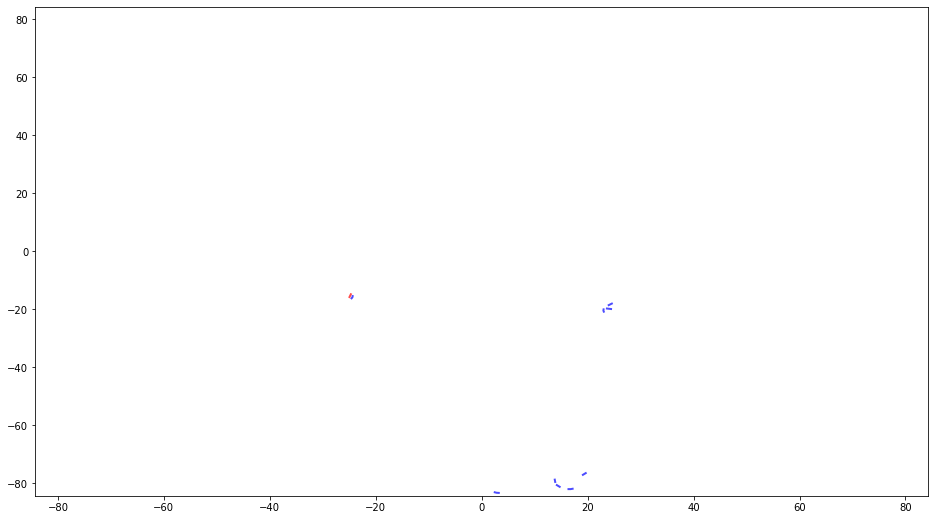

In [19]:
traj_to_video(199000,'videos/Small_steering','mp4', data_folder="argo_data_small_steering/data")

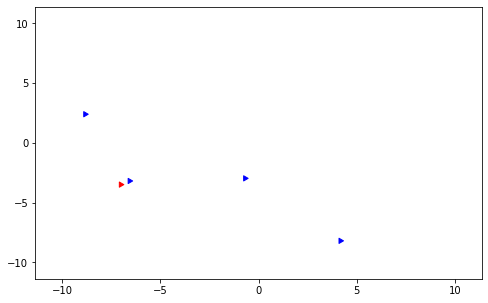

In [13]:
anim_p = animate_trajectory(58000, data_folder="data")
HTML(anim_p.to_html5_video())

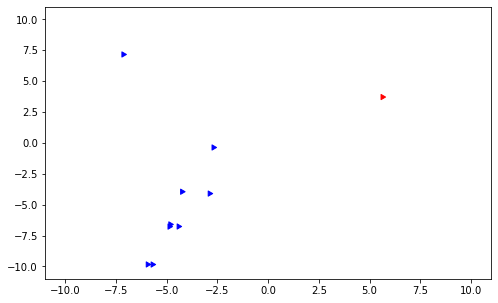

In [20]:
anim_p = animate_trajectory(98000, data_folder="data")
HTML(anim_p.to_html5_video())